PCA : Principle Component Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-  We take the data which follows normal distribution
- Based on above data we will create another data by multiplying some value
- so that both data have multicolinearity
- The both dataset have some covarience
- Then we will apply the PCA
- we will create two new PC(principal Component) will check the covarience matrix
- So pc should have covarience zero


## Step 2 create dataset 1

In [6]:
x = np.random.normal(200, 10, 500) # mean:200, std:10, no of obsetvation:500
x.mean()

200.6187255198865

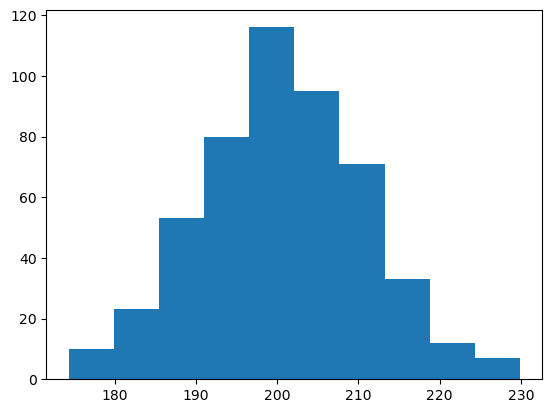

In [7]:
plt.hist(x)
plt.show()

In [8]:
# Create a data y, it should be corelated to x
y = 0.5 * x + np.random.normal(10, 5, 500)
# we are taking random sample
# and we are adding x to the sample
print('Mean', y.mean())
print('STD', y.std())

Mean 110.16903465790124
STD 7.074986577218061


### Plot the scatter plot

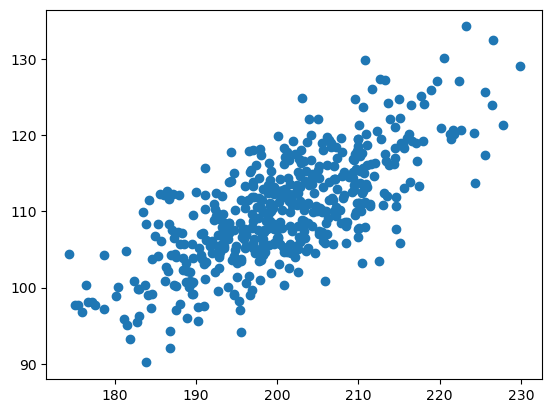

In [10]:
plt.scatter(x,y)
plt.show()

#### Observation
- Both points are corelated to each other

- Both points are not Orthogonal to each other

- Perform the covariance metrix for better idea

### Step 4 Covariance Matix

In [11]:
con_matrix = np.cov(x,y)
con_matrix

array([[101.271586  ,  52.10443739],
       [ 52.10443739,  50.15574656]])

In [12]:
import seaborn as sns

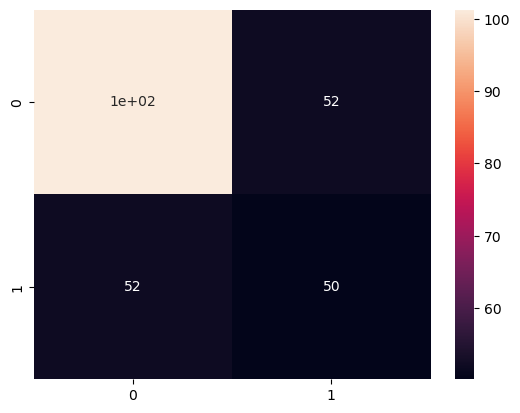

In [14]:
sns.heatmap(con_matrix, annot=True)
plt.show()

### Step 5 PCA
**Perform the PCA**
- to reduce the dimension
- to avoid multi collinearity
- to make data orthogonal

**will calculate the eigen values and eigen vactors of covariance matrix**


In [15]:
from numpy.linalg import eig

In [16]:
eig_value, eig_vactor = eig(con_matrix)

In [17]:
eig_vactor

array([[ 0.8486421 , -0.52896747],
       [ 0.52896747,  0.8486421 ]])

In [18]:
eig_value

array([133.74882507,  17.67850749])

**Observations**

- we have to data sample x and y, so we have **2X2 covariance matrix**
- when we apply eigen value and eigen vectors on 2X2 cov matrix, will get **two eigen values and two eigen vactors**
- eigen vectors will give the indication to **which direction data should flow** 
- if u see eigen vectors the magnitude is same but the direction is diff 
- the dot product of eigen values either one or zero , indicates **orthogonality**
- eigen values represent how much data should flow along that particular direction

Check Point : 1
- Preform the dot product of two eigen vactors

In [20]:
v1 = eig_vactor[0]
v2 = eig_vactor[1]

eig_vactor[0]
eig_vactor[1]

array([0.52896747, 0.8486421 ])

In [21]:
np.dot(v1,v2)

0.0

Check Point : 2
- 
- How much percentage of data should flow in each direction
- we will use eigen values, each eigen value divided by sum of the eigen values
- 

In [22]:
eig_value

array([133.74882507,  17.67850749])

In [23]:
133/(133+17), 17/(133+17)

(0.8866666666666667, 0.11333333333333333)

In [24]:
print('Variance Percentage : ', eig_value[0]*100/sum(eig_value))
print('Variance Percentage : ', eig_value[1]*100/sum(eig_value))

Variance Percentage :  88.32541840858826
Variance Percentage :  11.67458159141174


### Step : 6
- Create New data 
- multiplying eigen vactors to old data

In [26]:
z = np.vstack([x,y]).T # T is Transpose
# stacking means together
# Vertically stacking
# x,y

In [28]:
new_data = np.dot(z, eig_vactor)
new_data

array([[212.09872514, -14.17169926],
       [213.43661349, -14.39287921],
       [218.23156551,  -3.69966234],
       [234.31579947, -18.05830901],
       [202.40410065, -11.02961193],
       [235.65577203, -15.26949044],
       [224.73160136, -15.69786087],
       [232.93812861, -10.87190525],
       [220.89176872, -12.31799325],
       [237.97229734, -17.8011814 ],
       [226.09247804,  -5.35062325],
       [228.61109377, -17.10508029],
       [228.0510806 ,  -9.04932114],
       [232.90531227, -20.38597669],
       [226.37400641,  -7.50343781],
       [234.60978402,  -7.15267195],
       [238.5582    , -14.71496938],
       [225.69677773,  -9.22124411],
       [224.46571915, -18.44771984],
       [227.17079334, -10.2042338 ],
       [226.93290073,  -9.73889677],
       [226.09987532, -17.61080052],
       [253.52744129, -19.7003041 ],
       [234.34545352, -16.11558336],
       [229.40446989,  -8.47895125],
       [246.11383698,  -9.51614711],
       [240.4258601 , -10.93106393],
 

In [29]:
new_data = pd.DataFrame(new_data, columns=['PC1','PC2'])
new_data

,PC1,PC2
0,212.098725,-14.171699
1,213.436613,-14.392879
2,218.231566,-3.699662
3,234.315799,-18.058309
4,202.404101,-11.029612
...,...,...
495,217.237664,-3.244915
496,224.213396,-12.591581
497,226.320300,-12.623221
498,215.803348,-23.580912


### Step : 7

Check Point 3
- Covariance of the New Data 

In [32]:
pc1 = new_data['PC1'].values
pc2 = new_data['PC2'].values
np.cov(pc1,pc2)

array([[ 1.33748825e+02, -1.81337911e-14],
       [-1.81337911e-14,  1.76785075e+01]])

### Step : 8 
- Plot Scatter plot on New Data

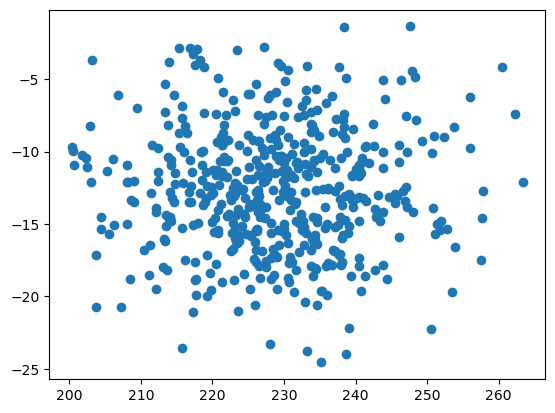

In [33]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.show()

### Plot both the old data and New data 

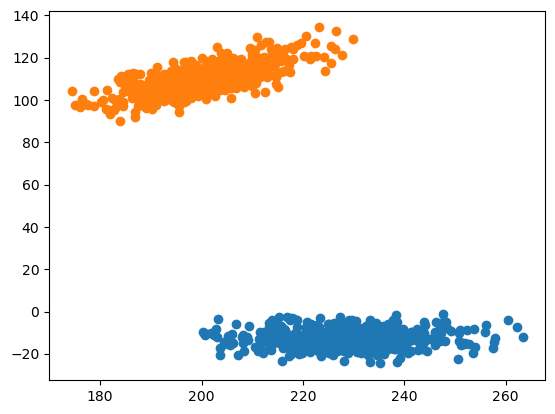

In [36]:
plt.scatter(new_data['PC1'],new_data['PC2']) # blue color is new data
plt.scatter(x,y) # orange color old data
plt.show()

**Obsetvations**
- we create the new data has two pcs 
- the two pcs include old data 
- the two pcs are independent each othe 
- the variance along PC1 is greater then PC2
- so we can choose only one component i.e PC1